In [1]:
from __future__ import print_function

%matplotlib inline
import numpy
import matplotlib.pyplot as plt
from scipy import integrate

The PDE:
$$
\begin{align}
b_t &= \left( \theta+a \right) b(1-b) 
       - w\frac{b\cdot\left(\theta+a\right)}{c+b\cdot\left(\theta+a\right)}
       + \mu b_{\theta\theta},\\
w_t & = -d w 
        + g w \int_0^{1} \frac{b\cdot\left(\theta+a\right)}{c +  b\cdot\left(\theta+a\right)} d\theta.
\end{align}
$$

The ODE:
$$
\begin{align}
b_t &= \left( \theta+a \right) b(1-b) 
       - w\cdot\left(\theta+a\right)\frac{b}{c+b\cdot\left(\theta+a\right)},
       \\
w_t &= -d w 
        + g w \frac{b\cdot\left(\theta+a\right)}{c + b\cdot\left(\theta+a\right)}.
\end{align}
$$

Restrictions on the parameters:
$$
\begin{align}
g &> d, \\
c d  &< \left(\theta+a\right)\left(g-d\right).
\end{align}
$$



In [2]:
def rate_vector(a,c,d,g,theta,b,w):
    return(numpy.array(
        [(theta+a)*b*(1.0-b)-(theta+a)*w*b/(b*(theta+a)+c),
         -d*w+g*(theta+a)*w*b/(b*(theta+a)+c)]))

def vector_field(a,c,d,g,theta,b_max,w_max,num_b=20,num_w=20):
    b_field = numpy.linspace(0,b_max,num_b)
    w_field = numpy.linspace(0,w_max,num_w)
    b_vector = numpy.zeros([num_b,num_w])
    w_vector = numpy.zeros([num_b,num_w])
    for w_lupe in range(w_field.shape[0]):
        for b_lupe in range(b_field.shape[0]):
            w = w_field[w_lupe]
            b = b_field[b_lupe]
            deriv = rate_vector(a,c,d,g,theta,b,w)
            b_vector[w_lupe][b_lupe] = deriv[0]
            w_vector[w_lupe][b_lupe] = deriv[1]
            length = numpy.sqrt(b_vector[w_lupe][b_lupe]*b_vector[w_lupe][b_lupe]+
                                w_vector[w_lupe][b_lupe]*w_vector[w_lupe][b_lupe])
            if(numpy.fabs(length)>1e-5):
                b_vector[w_lupe][b_lupe] /= length
                w_vector[w_lupe][b_lupe] /= length

    return([b_field,w_field,b_vector,w_vector])



In [3]:

def plot_phase(a,c,d,g,theta,b_max=2,w_max=2,initial_b=0.2,initial_w=0.2):
    b_plot = numpy.linspace(0,b_max,100)
    w_plot = numpy.linspace(0,w_max,100)

    b_nullcline_one = numpy.array([b_plot,(1.0-b_plot)*(c+b_plot*(theta+a))])
    b_nullcline_two = numpy.array([[0.0,0.0],[0.0,w_max]])

    w_nullcline_one = numpy.array(
        [[d*c/((theta+a)*(g-d)),d*c/((theta+a)*(g-d))],[0.0,w_max]]
    )
    w_nullcline_two = numpy.array([[0.0,b_max],[0.0,0.0]])

    [b_field,w_field,b_vector,w_vector] = vector_field(a,c,d,g,theta,b_max,w_max,20,20)

    fig = plt.figure()
    axes = fig.add_subplot(1, 1, 1)

    axes.set_xlabel("b")
    axes.set_ylabel("w")
    axes.set_title("b/w phase plane, $\\theta$={0}".format(theta))
    #axes.ticklabel_format(axis='y', style='sci', scilimits=(-1,1))
    axes.set_xlim(-0.1, b_max)
    axes.set_ylim(-0.1, w_max)

    axes.plot(b_nullcline_one[0],b_nullcline_one[1],'r')
    axes.plot(b_nullcline_two[0],b_nullcline_two[1],'r')

    axes.plot(w_nullcline_one[0],w_nullcline_one[1],'b')
    axes.plot(w_nullcline_two[0],w_nullcline_two[1],'b')

    axes.quiver(b_field,w_field,b_vector,w_vector)
    
    #t = numpy.linspace(0,10,100)
    #initial = numpy.array([initial_b,initial_w])
    #approx, info_dict = integrate.odeint(rate_vector,initial,t,full_output=True)

    return([plt,axes])


def plotSolutions(a,c,d,g,theta,initial,axes):
    
    def theRate(y,t,a,c,d,g,theta):
        return(rate_vector(a,c,d,g,theta,y[0],y[1]))
    
    args = (a,c,d,g,theta)
    t = numpy.linspace(0.0,10.0,100)
    for starting in initial:
        y = integrate.odeint(theRate,starting,t,args=args)
        axes.plot(y[:,0],y[:,1],'g')
    
    

In [4]:
def linearization_eigenvalues(a,c,d,g,theta,axes):
    
    b = d*c/((theta+a)*(g-d))
    w = (1.0-b)*(c+b*(theta+a))
    print("fixed points, b: {0}, w: {1}".format(b,w))
    axes.plot(b,w,'g*')

    J11 = (theta+a)*(1.0-2.0*b)-w*(theta+a)*c/((c+b*(theta+a))**2)
    J12 = -(theta+a)*b/(c+b*(theta+a))
    J21 = g*w*(theta+a)*c/((c+b*(theta+a))**2)
    J22 = -d + g*(theta+a)*b/(c+b*(theta+a))
    #print("Jacobian:\n{0} {1}\n{2} {3}".format(J11,J12,J21,J22))
    discriminant = J11*J11+4.0*J12*J21
    #print("Discriminant: {0}".format(discriminant))
    
    eig1_real = 0.0
    eig1_imag = 0.0
    
    eig2_real = 0.0
    eig2_imag = 0.0
    
    if(discriminant<0):
        eig1_real = J11*0.5
        eig2_real = eig1_real
        
        eig1_imag = numpy.sqrt(-discriminant)*0.5
        eig2_imag = -eig1_imag
        
        print("Complex: real: {0} imag: {1}".format(eig1_real,eig1_imag))
        
    else:
        eig1_real = (J11-numpy.sqrt(discriminant))*0.5
        eig2_real = (J11+numpy.sqrt(discriminant))*0.5
        
        print("Real: eig1: {0} eig2: {1}".format(eig1_real,eig2_real))
    
    
    return([eig1_real,eig1_imag,eig2_real,eig2_imag])

fixed points, b: 1.7499999999999998, w: -1.0499999999999996
Real: eig1: -0.9999999999999999 eig2: 0.15000000000000002


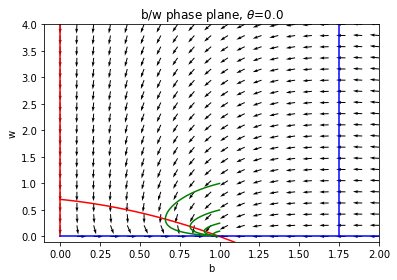

fixed points, b: 1.0769230769230769, w: -0.10769230769230762
Real: eig1: -0.7579823004889094 eig2: 0.03298230048890938


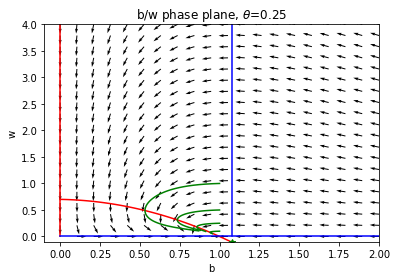

fixed points, b: 0.7777777777777777, w: 0.3111111111111112
Complex: real: -0.29999999999999993 imag: 0.10000000000000053


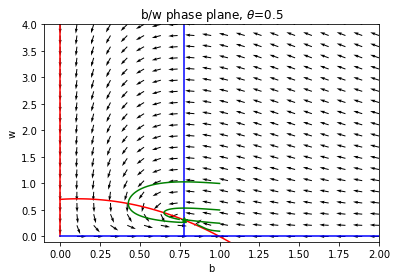

fixed points, b: 0.5, w: 0.7
Complex: real: -0.175 imag: 0.5651327277728657


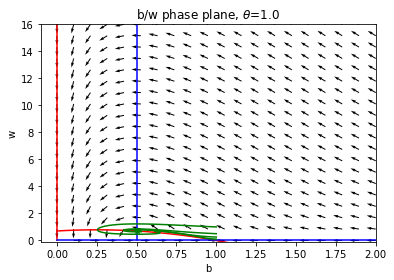

In [17]:
g     = 2.0
d     = 1.0
c     = 0.7
theta = 0.0
a     = 0.4 # bigger a is the more variation in the system

[plt0,axes0] = plot_phase(a,c,d,g,theta,2.0,4.0)
plotSolutions(a,c,d,g,theta,
              numpy.array([[1.0,1.0],[1.0,0.5],[1.0,0.25],[1.0,0.1]]),
              axes0)
linearization_eigenvalues(a,c,d,g,theta,axes0)
plt0.show()


theta = 0.25
[plt1,axes1] = plot_phase(a,c,d,g,theta,2.0,4.0)
plotSolutions(a,c,d,g,theta,
              numpy.array([[1.0,1.0],[1.0,0.5],[1.0,0.25],[1.0,0.1]]),
              axes1)
linearization_eigenvalues(a,c,d,g,theta,axes1)
plt1.show()

theta = 0.5
[plt2,axes2] = plot_phase(a,c,d,g,theta,2.0,4.0)
plotSolutions(a,c,d,g,theta,
              numpy.array([[1.0,1.0],[1.0,0.5],[1.0,0.25],[1.0,0.1]]),
              axes2)
linearization_eigenvalues(a,c,d,g,theta,axes2)
plt2.show()

theta = 1.0
[plt3,axes3] = plot_phase(a,c,d,g,theta,2.0,16.0)
plotSolutions(a,c,d,g,theta,
              numpy.array([[1.0,1.0],[1.0,0.5],[1.0,0.25],[1.0,0.1]]),
              axes3)
linearization_eigenvalues(a,c,d,g,theta,axes3)
plt3.show()

